<a href="https://colab.research.google.com/github/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./blob/main/Main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1></h1>

# Regression experiments

## Experiments with dataset with statistical values for the whole jumbo

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution



###Data visualization and preprocessing


Import pre-required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
cmap = sns.cm.mako_r
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [36]:
dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/StatisticalOnFullJumboDataset.csv'

In [37]:
runs = pd.read_csv(dataset_url, sep=';')

Describe data

In [5]:
runs.head()

,RUNNUMBER,MaxWidth,MinWidth,NumberOfOrders,AverageWidth,Deviation,AVGNUMBEROFREELS,WeightedAverageWidth,TOTALWASTEPERCENT
0,1,6100,500,114,2869.736842,1674.200621,914.380037,2841.885883,0.628959
1,2,5800,900,78,3391.346154,1725.217975,527.073171,3267.406710,4.398778
2,3,6100,1500,78,3664.423077,1605.831091,578.356221,3635.490177,7.828784
3,4,6100,500,72,3813.541667,1878.721366,588.075038,3634.856429,3.385417
4,5,6100,400,105,3182.142857,1634.946314,835.282809,2654.450214,1.081588


In [6]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RUNNUMBER             564 non-null    int64  
 1   MaxWidth              564 non-null    int64  
 2   MinWidth              564 non-null    int64  
 3   NumberOfOrders        564 non-null    int64  
 4   AverageWidth          564 non-null    float64
 5   Deviation             564 non-null    float64
 6   AVGNUMBEROFREELS      564 non-null    float64
 7   WeightedAverageWidth  564 non-null    float64
 8   TOTALWASTEPERCENT     564 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 39.8 KB


In [7]:
runs.drop(columns=['RUNNUMBER']).describe()

,MaxWidth,MinWidth,NumberOfOrders,AverageWidth,Deviation,AVGNUMBEROFREELS,WeightedAverageWidth,TOTALWASTEPERCENT
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,5974.290780,760.948582,144.230496,3265.561841,1563.084004,1147.623245,3259.408232,2.491932
std,224.507419,272.497552,75.940334,282.004223,131.998670,608.360188,318.968462,2.100439
min,4000.000000,400.000000,36.000000,2117.187500,870.148499,231.266732,2157.415624,0.032345
25%,6000.000000,600.000000,81.000000,3103.625000,1488.426615,635.176017,3064.836977,1.211506
50%,6100.000000,600.000000,126.000000,3278.141026,1575.472321,1018.240519,3273.901584,1.883947
75%,6100.000000,800.000000,201.750000,3434.074519,1646.696097,1588.741400,3469.480477,3.172152
max,6100.000000,1900.000000,352.000000,4348.076923,1942.263086,2644.482169,4443.279295,20.675751


In [8]:
runs = runs.fillna(0)

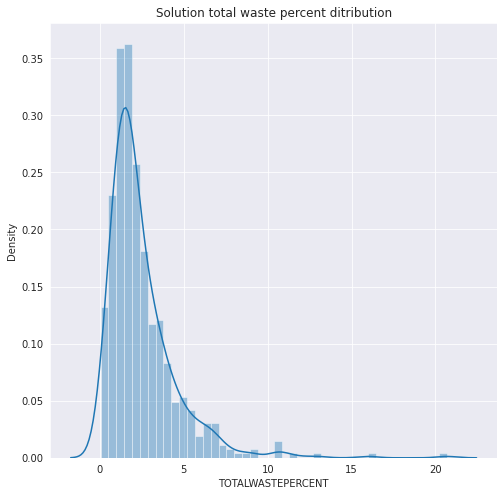

In [ ]:
plt.figure(figsize=(8,8))

plt.title('Solution total waste percent ditribution')
sns.distplot(runs['TOTALWASTEPERCENT'])

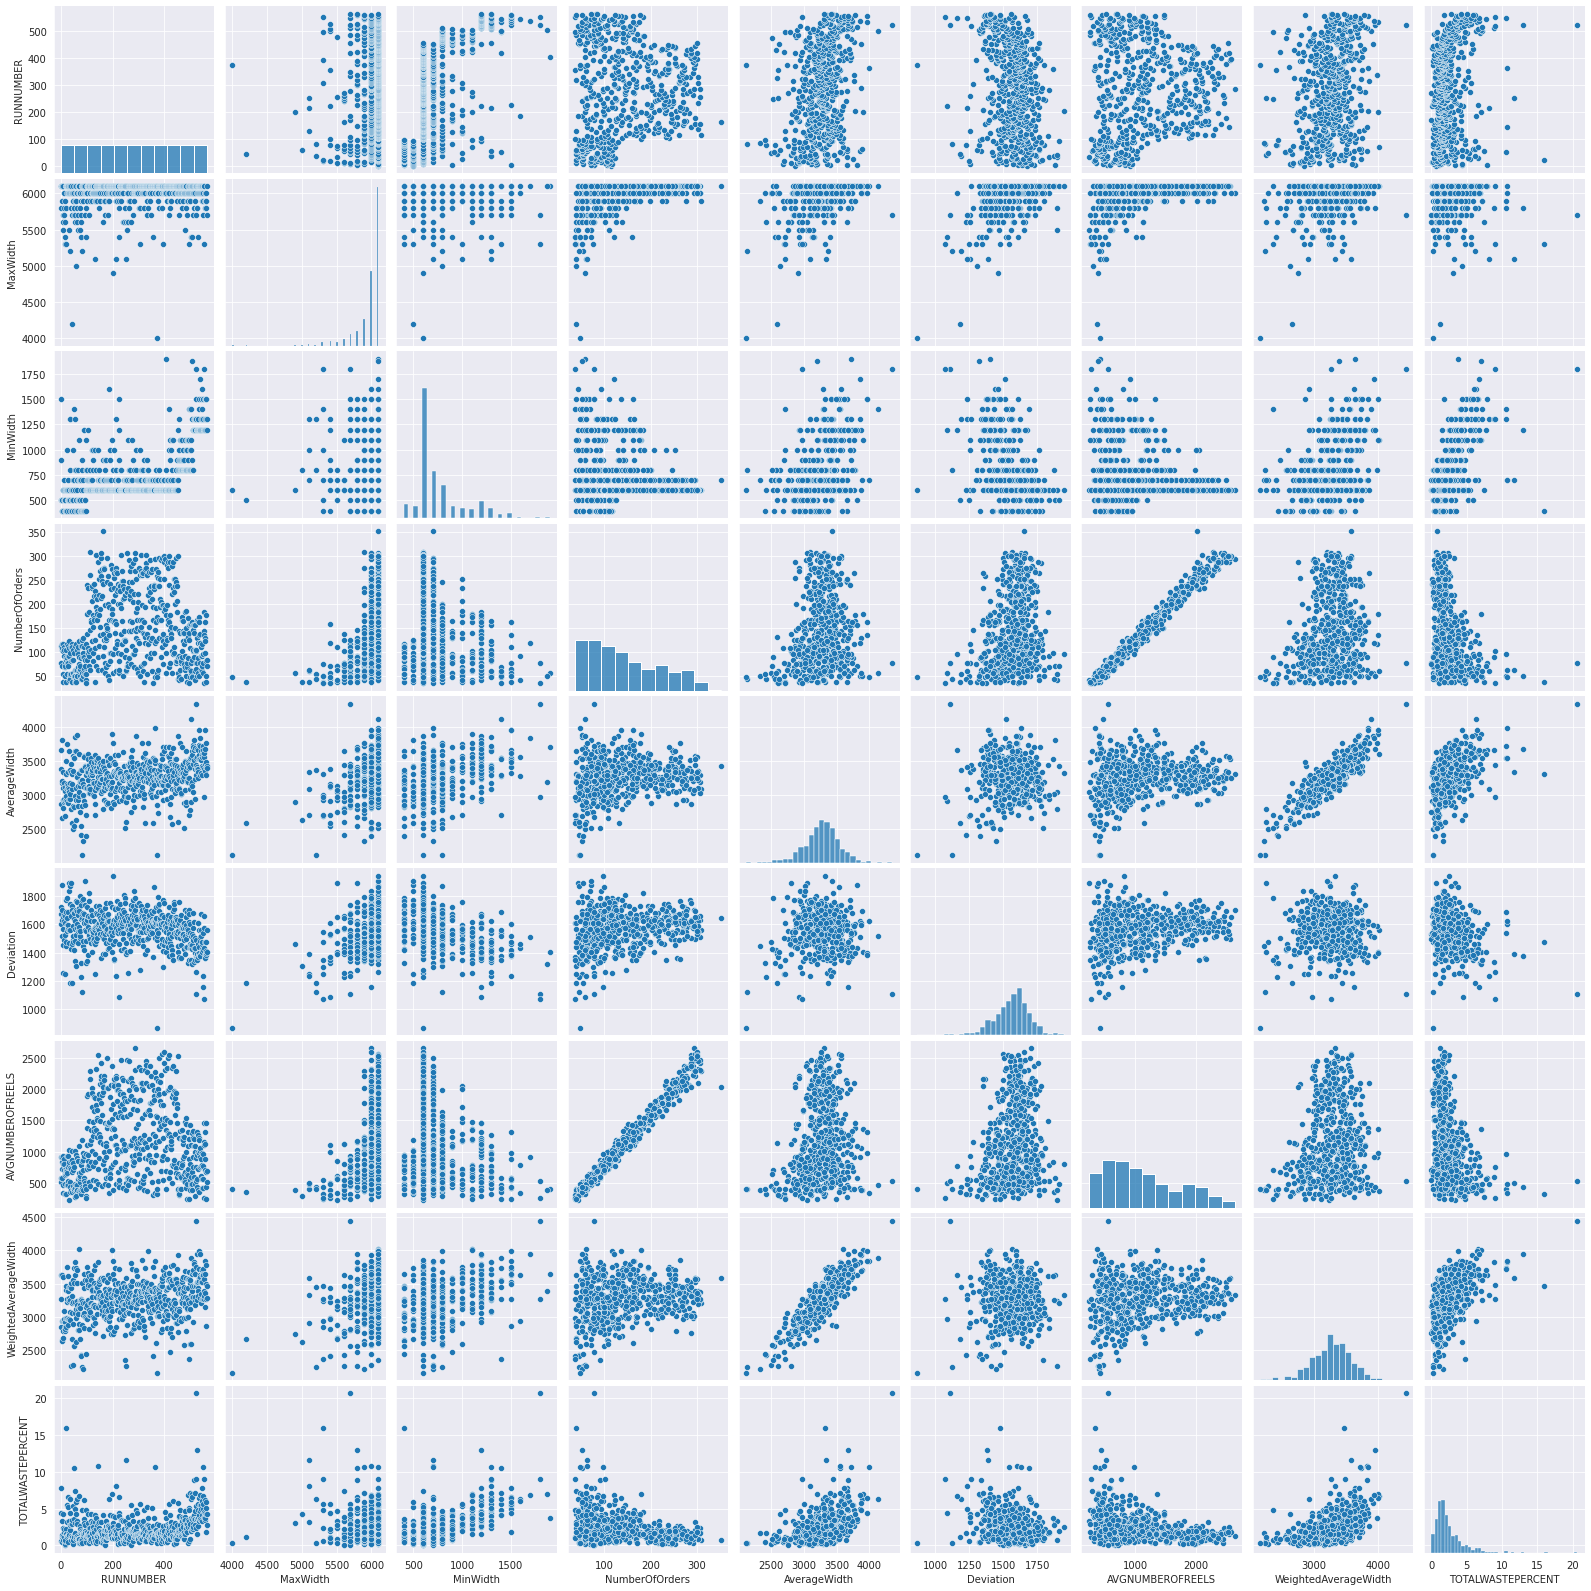

In [ ]:
ax = sns.pairplot(runs[runs.columns])

In [9]:
def plot_corr_matrix(datast):
    corrMatrix = datast.corr()
    plt.figure(figsize=(35,15))
    sns.heatmap(corrMatrix, annot=True)
    plt.show()
    

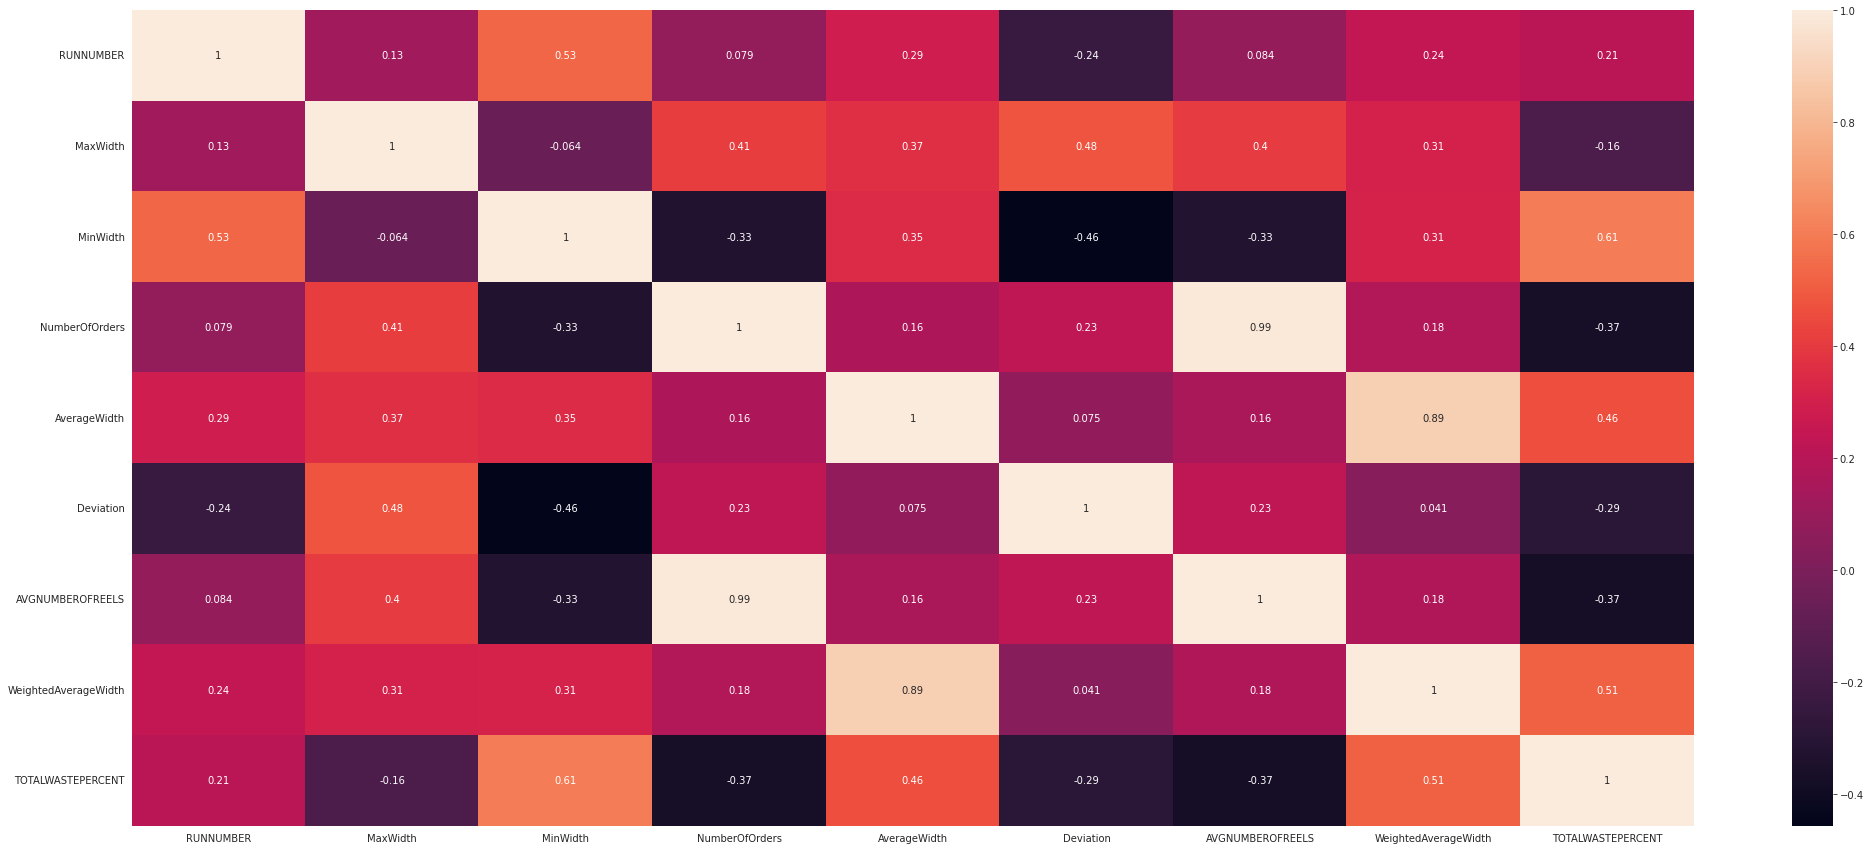

In [ ]:
plot_corr_matrix(runs)

We see that average number of reels is highly correlated with number of orders.

### Regression experiments

In [10]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'NumberOfOrders'])
y = runs['TOTALWASTEPERCENT']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [12]:
from sklearn import metrics
def regression_model_metrics(y_test, y_pred):
  return metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [13]:
def test_regression_model(model, l_x_train, l_x_test, l_y_train, l_y_test):
  model.fit(l_x_train, l_y_train)
  return regression_model_metrics(l_y_test, model.predict(l_x_test))

In [14]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
def test_regression_models(l_x_train, l_x_test, l_y_train, l_y_test):
  results = {}

  mean_absolute_error, mean_squared_error, root_mean_square_error = test_regression_model(LinearRegression(), X_train, X_test, y_train, y_test)
  results['Linear regression'] = (('Mean absolute error', mean_absolute_error), ('Mean square error', mean_squared_error), ('Root mean square error', root_mean_square_error))

  mean_absolute_error, mean_squared_error, root_mean_square_error = test_regression_model(SGDRegressor(), X_train, X_test, y_train, y_test)
  results['SGD regressor'] = (('Mean absolute error', mean_absolute_error), ('Mean square error', mean_squared_error), ('Root mean square error', root_mean_square_error))
  
  mean_absolute_error, mean_squared_error, root_mean_square_error = test_regression_model(ElasticNet(), X_train, X_test, y_train, y_test)
  results['ElasticNet'] = (('Mean absolute error', mean_absolute_error), ('Mean square error', mean_squared_error), ('Root mean square error', root_mean_square_error))
  
  mean_absolute_error, mean_squared_error, root_mean_square_error = test_regression_model(BayesianRidge(), X_train, X_test, y_train, y_test)
  results['BayesianRidge'] = (('Mean absolute error', mean_absolute_error), ('Mean square error', mean_squared_error), ('Root mean square error', root_mean_square_error))
  
  return results


In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

In [ ]:
results

{'BayesianRidge': (('Mean absolute error', 1.0367834136015548),
  ('Mean square error', 3.717083202799929),
  ('Root mean square error', 1.927973859470073)),
 'ElasticNet': (('Mean absolute error', 1.0349455385687398),
  ('Mean square error', 3.707444442967674),
  ('Root mean square error', 1.925472524594333)),
 'Linear regression': (('Mean absolute error', 1.0345728684684843),
  ('Mean square error', 3.706385579965896),
  ('Root mean square error', 1.9251975431019788)),
 'SGD regressor': (('Mean absolute error', 2.2076715923188716e+16),
  ('Mean square error', 5.011583735814121e+32),
  ('Root mean square error', 2.2386566810956344e+16))}

In [15]:
from sklearn.preprocessing import StandardScaler
def Standarize_data(l_x_train, l_x_test):
  scalify = StandardScaler()
  return scalify.fit_transform(X_train), scalify.fit_transform(X_test)

In [ ]:
standarize_x_train, standarize_x_test = Standarize_data(X_train, X_test)

In [ ]:
results = test_regression_models(standarize_x_train, standarize_x_test, y_train, y_test)

In [ ]:
results

{'BayesianRidge': (('Mean absolute error', 1.0367834136015548),
  ('Mean square error', 3.717083202799929),
  ('Root mean square error', 1.927973859470073)),
 'ElasticNet': (('Mean absolute error', 1.0349455385687398),
  ('Mean square error', 3.707444442967674),
  ('Root mean square error', 1.925472524594333)),
 'Linear regression': (('Mean absolute error', 1.0345728684684843),
  ('Mean square error', 3.706385579965896),
  ('Root mean square error', 1.9251975431019788)),
 'SGD regressor': (('Mean absolute error', 1.7985080886388076e+16),
  ('Mean square error', 3.276874341048177e+32),
  ('Root mean square error', 1.8102138937286324e+16))}

### **Repeat experiments after multiplying by 10 Y**

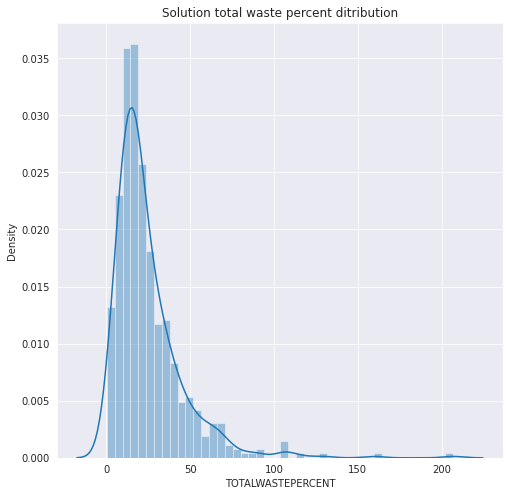

In [16]:
plt.figure(figsize=(8,8))

plt.title('Solution total waste percent ditribution')
sns.distplot(y*10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y*10, test_size=0.20, random_state = 0)

In [ ]:
results = test_regression_models(X_train, X_test, y_train, y_test)

In [ ]:
results

{'BayesianRidge': (('Mean absolute error', 10.370071905316706),
  ('Mean square error', 371.83502009198907),
  ('Root mean square error', 19.283024142804702)),
 'ElasticNet': (('Mean absolute error', 10.34612736302938),
  ('Mean square error', 370.6489426791038),
  ('Root mean square error', 19.252245133467)),
 'Linear regression': (('Mean absolute error', 10.345728684684842),
  ('Mean square error', 370.6385579965896),
  ('Root mean square error', 19.25197543101979)),
 'SGD regressor': (('Mean absolute error', 3.5897528462038176e+16),
  ('Mean square error', 1.338217150489814e+33),
  ('Root mean square error', 3.6581650461533496e+16))}

In [ ]:
results = test_regression_models(X_train, standarize_x_test, y_train, y_test)

In [ ]:
results

{'BayesianRidge': (('Mean absolute error', 10.370071905316706),
  ('Mean square error', 371.83502009198907),
  ('Root mean square error', 19.283024142804702)),
 'ElasticNet': (('Mean absolute error', 10.34612736302938),
  ('Mean square error', 370.6489426791038),
  ('Root mean square error', 19.252245133467)),
 'Linear regression': (('Mean absolute error', 10.345728684684842),
  ('Mean square error', 370.6385579965896),
  ('Root mean square error', 19.25197543101979)),
 'SGD regressor': (('Mean absolute error', 6900074340017881.0),
  ('Mean square error', 6.103790905344013e+31),
  ('Root mean square error', 7812676177433705.0))}

## Experiments with dataset with statistical values for the every jumbo n/10 of the input

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution

###Data visualization and preprocessing


In [17]:
extended_dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/StatisticalOnSeparatedJumboDataset.csv'

In [18]:
extended_runs = pd.read_csv(extended_dataset_url, sep=';')

In [19]:
extended_runs.head()

,RUNNUMBER,MaxWidth,MinWidth,NumberOfOrders,AverageWidth,Deviation,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,AVOrders1,AVOrders2,AVOrders3,AVOrders4,AVOrders5,AVOrders6,AVOrders7,AVOrders8,AVOrders9,AVOrders10,MultiplicationOfReels1,MultiplicationOfReels2,MultiplicationOfReels3,MultiplicationOfReels4,MultiplicationOfReels5,MultiplicationOfReels6,MultiplicationOfReels7,MultiplicationOfReels8,MultiplicationOfReels9,MultiplicationOfReels10,Dev1,Dev2,Dev3,Dev4,...,Avg2,Avg3,Avg4,Avg5,Avg6,Avg7,Avg8,Avg9,Avg10,Min1,Min2,Min3,Min4,Min5,Min6,Min7,Min8,Min9,Min10,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,WeightedAverage1,WeightedAverage2,WeightedAverage3,WeightedAverage4,WeightedAverage5,WeightedAverage6,WeightedAverage7,WeightedAverage8,WeightedAverage9,WeightedAverage10,TOTALWASTEPERCENT
0,1,6100,500,27,2869.736842,1674.200621,6,18,12,24,6,9,21,6,0,12,144.801009,356.297899,454.611611,564.309434,140.009826,59.740077,592.480171,153.670195,NaN,277.219889,76960.301189,288126.454138,666504.197270,1.301153e+06,384305.487761,223412.341326,2.460102e+06,7.529840e+05,NaN,1.642143e+06,54.772256,142.457424,135.680105,123.633839,...,850.000000,1475.000000,2256.250000,2750.000000,3700.0,4100.0,4900.000000,NaN,5950.0,500.0,700.0,1400.0,2000.0,2700.0,3500.0,3900.0,4900.0,NaN,5800.0,600.0,1100.0,1700.0,2400.0,2800.0,3800.0,4400.0,4900.0,NaN,6100.0,531.490088,808.667282,1466.095852,2305.744206,2744.846556,3739.739749,4152.209608,4900.000000,NaN,5923.613051,0.628959
1,2,5800,900,19,3391.346154,1725.217975,0,9,15,9,3,12,3,3,24,0,NaN,154.191064,495.408799,78.159508,27.090275,274.489376,71.300260,33.880075,446.700156,NaN,NaN,140906.928808,871013.221031,1.803889e+05,86688.879791,909414.892603,3.137211e+05,1.592364e+05,2.505117e+06,NaN,NaN,50.000000,215.886875,180.277564,...,933.333333,1675.000000,2333.333333,3200.000000,3350.0,4400.0,4700.000000,5537.5,NaN,NaN,900.0,1300.0,2100.0,3200.0,3300.0,4400.0,4700.0,5300.0,NaN,NaN,1000.0,1875.0,2500.0,3200.0,3500.0,4400.0,4700.0,5800.0,NaN,NaN,913.846273,1758.170674,2307.958468,3200.000000,3313.115087,4400.000000,4700.000000,5608.050258,NaN,4.398778
2,3,6100,1500,21,3664.423077,1605.831091,0,0,9,21,6,6,6,9,15,6,NaN,NaN,126.580042,553.678609,39.970201,225.000117,172.259782,236.749617,223.510176,157.320118,NaN,NaN,207286.346935,1.135139e+06,113710.629790,772200.441697,7.135370e+05,1.164140e+06,1.242159e+06,9.596527e+05,NaN,NaN,200.000000,92.582010,...,NaN,1633.333333,2082.142857,2950.000000,3450.0,4200.0,4900.000000,5540.0,6100.0,NaN,NaN,1500.0,2000.0,2800.0,3300.0,4100.0,4700.0,5400.0,6100.0,NaN,NaN,1900.0,2275.0,3100.0,3600.0,4300.0,5200.0,5800.0,6100.0,NaN,NaN,1637.591078,2050.176121,2844.885082,3432.000175,4142.214931,4917.178835,5557.505498,6100.000000,7.828784
3,4,6100,500,19,3813.541667,1878.721366,3,6,9,6,0,6,6,9,15,12,17.937234,168.177585,270.679882,205.320015,NaN,242.139723,105.620679,133.269751,446.000367,175.079878,8968.616904,143481.995205,444567.604692,4.329781e+05,NaN,867261.107355,4.119206e+05,6.543577e+05,2.394426e+06,1.054743e+06,0.000000,54.772256,132.287566,178.009831,...,850.000000,1633.333333,2112.500000,NaN,3550.0,3900.0,4800.000000,5360.0,6025.0,500.0,800.0,1500.0,1950.0,NaN,3300.0,3900.0,4700.0,5300.0,5900.0,500.0,900.0,1800.0,2275.0,NaN,3800.0,3900.0,5000.0,5500.0,6100.0,500.000000,853.157664,1642.410959,2108.796452,NaN,3581.655653,3900.000000,4910.024524,5368.663566,6024.354423,3.385417
4,5,6100,400,29,3182.142857,1634.946314,6,12,9,18,9,15,12,9,3,12,203.757039,425.171612,298.459392,543.560654,236.560100,267.129201,166.190577,156.020375,30.799835,178.199642,81502.815655,489816.750853,547929.593712,1.190534e+06,711824.269377,943047.220785,7.052003e+05,7.510258e+05,1.632391e+05,1.067530e+06,0.000000,52.223297,45.069391,140.900465,...,1150.000000,1841.666667,2175.000000,3033.333333,3560.0,4200.0,4833.333333,5300.0,5975.0,400.0,1100.0,1800.0,2000.0,2900.0,3400.0,4000.0,4800.0,5300.0,5800.0,400.0,1200.0,1900.0,2400.0,3200.0,3700.0,4400.0,4900.0,5300.0,6100.0,400.000000,1152.044813,1835.859780,219

In [20]:
extended_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RUNNUMBER                564 non-null    int64  
 1   MaxWidth                 564 non-null    int64  
 2   MinWidth                 564 non-null    int64  
 3   NumberOfOrders           564 non-null    int64  
 4   AverageWidth             564 non-null    float64
 5   Deviation                564 non-null    float64
 6   W1                       564 non-null    int64  
 7   W2                       564 non-null    int64  
 8   W3                       564 non-null    int64  
 9   W4                       564 non-null    int64  
 10  W5                       564 non-null    int64  
 11  W6                       564 non-null    int64  
 12  W7                       564 non-null    int64  
 13  W8                       564 non-null    int64  
 14  W9                       5

In [21]:
extended_runs.drop(columns=['RUNNUMBER']).describe()

,MaxWidth,MinWidth,NumberOfOrders,AverageWidth,Deviation,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,AVOrders1,AVOrders2,AVOrders3,AVOrders4,AVOrders5,AVOrders6,AVOrders7,AVOrders8,AVOrders9,AVOrders10,MultiplicationOfReels1,MultiplicationOfReels2,MultiplicationOfReels3,MultiplicationOfReels4,MultiplicationOfReels5,MultiplicationOfReels6,MultiplicationOfReels7,MultiplicationOfReels8,MultiplicationOfReels9,MultiplicationOfReels10,Dev1,Dev2,Dev3,Dev4,Dev5,...,Avg2,Avg3,Avg4,Avg5,Avg6,Avg7,Avg8,Avg9,Avg10,Min1,Min2,Min3,Min4,Min5,Min6,Min7,Min8,Min9,Min10,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,WeightedAverage1,WeightedAverage2,WeightedAverage3,WeightedAverage4,WeightedAverage5,WeightedAverage6,WeightedAverage7,WeightedAverage8,WeightedAverage9,WeightedAverage10,TOTALWASTEPERCENT
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,286.000000,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,286.000000,5.120000e+02,5.590000e+02,5.620000e+02,5.420000e+02,5.430000e+02,5.340000e+02,5.320000e+02,5.390000e+02,5.000000e+02,286.000000,512.000000,559.000000,562.000000,542.000000,...,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,286.000000,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,286.000000,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,286.000000,512.000000,559.000000,562.000000,542.000000,543.000000,534.000000,532.000000,539.000000,500.000000,564.000000
mean,5974.290780,760.948582,30.687943,3265.561841,1563.084004,2.547872,14.062057,18.648936,21.278369,15.698582,15.469858,15.583333,15.962766,15.452128,9.526596,120.766645,370.639740,451.614449,512.748049,383.388876,379.874951,395.222040,412.162116,386.140590,252.723004,69729.414535,3.584146e+05,7.317475e+05,1.133386e+06,1.108806e+06,1.340216e+06,1.644697e+06,1.981398e+06,2.101607e+06,1.503964e+06,3.701174,122.746226,164.614083,147.674314,140.686771,...,975.779921,1627.928223,2201.831566,2882.818327,3528.618459,4158.628941,4810.422375,5440.586058,5957.195945,574.475524,819.921875,1407.200358,2011.432384,2703.136531,3354.327808,3979.962547,4628.947368,5258.627087,5876.400000,581.818182,1127.929688,1830.187835,2412.722420,3058.487085,3697.790055,4342.134831,4992.857143,5620.779221,6037.400000,577.940762,974.370932,1626.615481,2205.203508,2884.888784,3530.442841,4158.820085,4810.513873,5440.789852,5957.727406,2.491932
std,224.507419,272.497552,10.807132,282.004223,131.998670,3.209031,11.144683,11.685221,11.197349,10.715335,11.014320,10.750776,11.565108,10.193658,7.352408,77.926332,257.659146,293.566152,291.643208,261.148500,275.766503,262.842841,296.089105,257.009579,182.094562,45721.102098,2.488567e+05,4.748489e+05,6.493947e+05,7.584777e+05,9.748354e+05,1.095804e+06,1.422643e+06,1.401590e+06,1.081479e+06,16.135290,73.245368,71.852923,53.622877,73.336742,...,112.849807,106.726667,75.572607,111.154398,111.806874,109.988469,108.458587,112.670788,82.554073,60.514500,158.988959,149.231265,84.053098,137.610100,142.249519,137.762877,140.581323,137.876784,112.018464,51.143230,126.449370,116.560668,121.150418,146.782872,141.273518,147.410203,135.246564,148.519789,88.752431,54.068090,119.747052,113.535470,83.338386,119.880421,120.364749,117.334644,117.257090,122.064060,86.037155,2.100439
min,4000.000000,400.000000,10.000000,2117.187500,870.148499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.059066,6.079608,5.920060,21.350217,8.880326,9.060092,6.099940,6.180166,15.299918,6.179977,3029.532800,6.447822e+03,1.065611e+04,5.124052e+04,2.386673e+04,3.261633e+04,2.402273e+04,3.028282e+04,8.108957e+04,3.646186e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,700.000000,1300.000000,1962.500000,2600.000000,3200.000000,3800.000000,4500.0000

In [24]:
extended_runs = extended_runs.fillna(0)

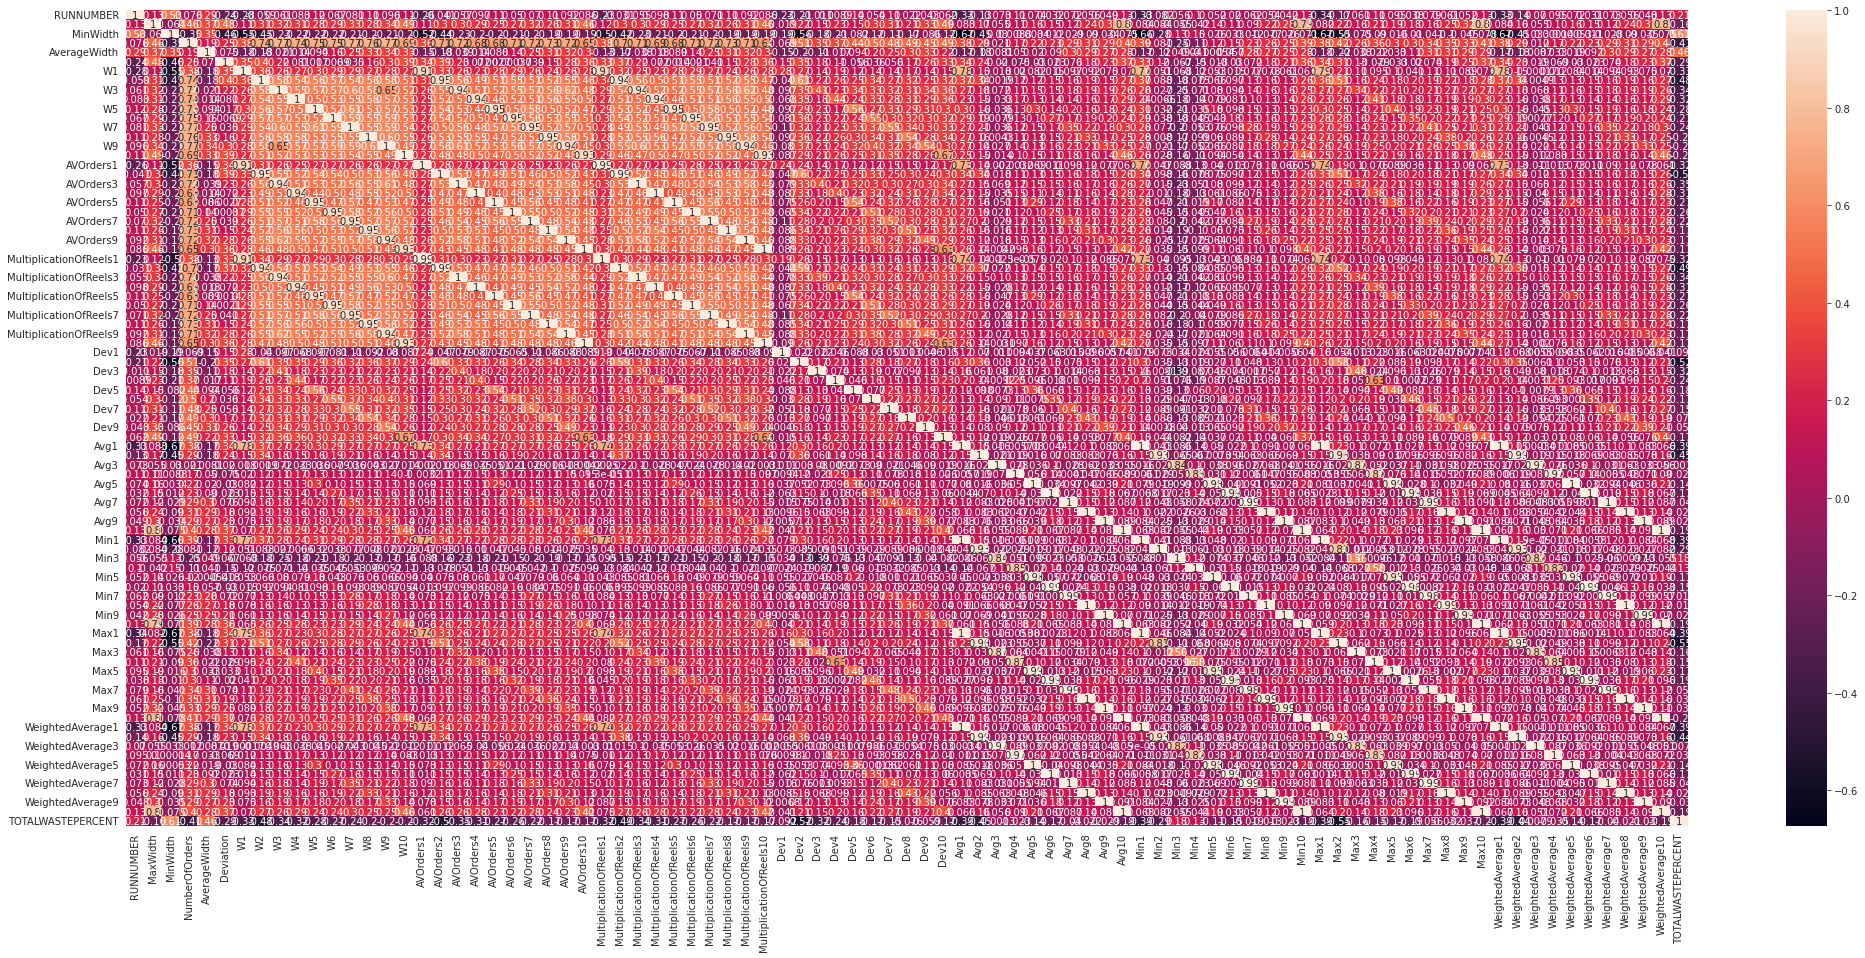

In [25]:
plot_corr_matrix(extended_runs)

### Regression experiments

In [26]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'NumberOfOrders'])
y = extended_runs['TOTALWASTEPERCENT']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [29]:
results = test_regression_models(X_train, X_test, y_train, y_test)

In [30]:
results

{'BayesianRidge': (('Mean absolute error', 1.014486806357372),
  ('Mean square error', 3.5141733335077254),
  ('Root mean square error', 1.8746128489658138)),
 'ElasticNet': (('Mean absolute error', 1.0214966906872127),
  ('Mean square error', 3.4495551003912457),
  ('Root mean square error', 1.8572977952905791)),
 'Linear regression': (('Mean absolute error', 1.0045120834594254),
  ('Mean square error', 3.059273240383775),
  ('Root mean square error', 1.7490778257081)),
 'SGD regressor': (('Mean absolute error', 2.4711699669272615e+21),
  ('Mean square error', 9.789858818392641e+42),
  ('Root mean square error', 3.1288750084323667e+21))}

In [31]:
standarize_x_train, standarize_x_test = Standarize_data(X_train, X_test)

In [32]:
results = test_regression_models(standarize_x_train, standarize_x_test, y_train, y_test)

In [33]:
results

{'BayesianRidge': (('Mean absolute error', 1.014486806357372),
  ('Mean square error', 3.5141733335077254),
  ('Root mean square error', 1.8746128489658138)),
 'ElasticNet': (('Mean absolute error', 1.0214966906872127),
  ('Mean square error', 3.4495551003912457),
  ('Root mean square error', 1.8572977952905791)),
 'Linear regression': (('Mean absolute error', 1.0045120834594254),
  ('Mean square error', 3.059273240383775),
  ('Root mean square error', 1.7490778257081)),
 'SGD regressor': (('Mean absolute error', 7.537247443834232e+21),
  ('Mean square error', 9.604963721842874e+43),
  ('Root mean square error', 9.800491682483524e+21))}

# Classification experiments

Define classes method

In [39]:
def classification_condition(row):
  total_waste_value = row['TOTALWASTEPERCENT']
  if total_waste_value < 1:
    return 0
  if total_waste_value < 2:
    return 1
  return 2

## Classification experiments with dataset with statistical values for the whole jumbo

In [40]:
runs['Class'] = runs.apply (lambda row: classification_condition(row), axis=1)

### Experiments with original data

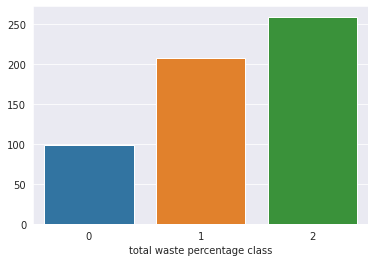

In [41]:
# Checking if Data is balanced
xs = runs['Class'].value_counts().index
ys = runs['Class'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("total waste percentage class")
plt.show()

Define methods:

*   Print metrics
*   Test model



In [42]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

def print_metrics(actual, prediction, model, x_test, y_test):
  print(f"Accuracy Score : {round(accuracy_score(actual, prediction) * 100, 2)}%")
  print(classification_report(actual, prediction))
  plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
  plt.grid(False)
  plt.show()

In [43]:
def test_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  preds = model.predict(xtest)
  print_metrics(ytest, preds, model, xtest, ytest)

In [44]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'Class'])
y = runs['Class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [74]:
def test_regression_models(l_x_train, l_x_test, l_y_train, l_y_test):
  print('Logistic regression')
  print('--------------------')
  print('--------------------')
  log_reg = LogisticRegression()
  test_model(log_reg, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Gaussian NB')
  print('--------------------')
  print('--------------------')
  nb = GaussianNB()
  test_model(nb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Random forest classifier')
  print('--------------------')
  print('--------------------')
  rf = RandomForestClassifier()
  test_model(rf, l_x_train, l_y_train, l_x_test, l_y_test)
  print('XGB classifier')
  print('--------------------')
  print('--------------------')
  xgb = XGBClassifier()
  test_model(xgb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('K neighbors')
  print('--------------------')
  print('--------------------')
  knn = KNeighborsClassifier()
  test_model(knn, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  dt = DecisionTreeClassifier()
  test_model(dt, l_x_train, l_y_train, l_x_test, l_y_test)
  print('SVM')
  print('--------------------')
  print('--------------------')
  svc =  SVC()
  test_model(svc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Linear discriminant analysis')
  print('--------------------')
  print('--------------------')
  linear_disc = LinearDiscriminantAnalysis()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  decision_trees = DecisionTreeClassifier()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)

Logistic regression
--------------------
--------------------
Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.75      0.12      0.20        26
           1       0.47      0.79      0.59        34
           2       0.82      0.79      0.81        53

    accuracy                           0.64       113
   macro avg       0.68      0.57      0.53       113
weighted avg       0.70      0.64      0.60       113



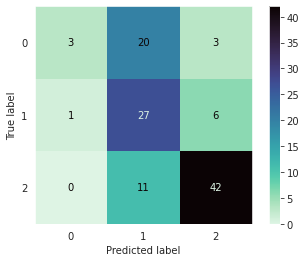

Gaussian NB
--------------------
--------------------
Accuracy Score : 61.95%
              precision    recall  f1-score   support

           0       0.42      0.19      0.26        26
           1       0.47      0.71      0.56        34
           2       0.82      0.77      0.80        53

    accuracy                           0.62       113
   macro avg       0.57      0.56      0.54       113
weighted avg       0.62      0.62      0.60       113



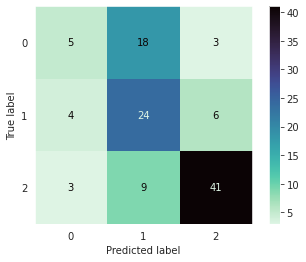

Random forest classifier
--------------------
--------------------
Accuracy Score : 60.18%
              precision    recall  f1-score   support

           0       0.33      0.12      0.17        26
           1       0.46      0.62      0.52        34
           2       0.76      0.83      0.79        53

    accuracy                           0.60       113
   macro avg       0.52      0.52      0.50       113
weighted avg       0.57      0.60      0.57       113



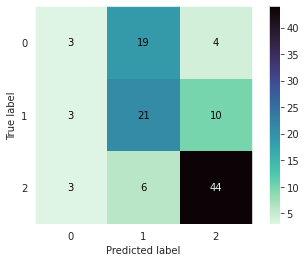

XGB classifier
--------------------
--------------------
Accuracy Score : 62.83%
              precision    recall  f1-score   support

           0       0.50      0.15      0.24        26
           1       0.43      0.65      0.52        34
           2       0.83      0.85      0.84        53

    accuracy                           0.63       113
   macro avg       0.59      0.55      0.53       113
weighted avg       0.64      0.63      0.60       113



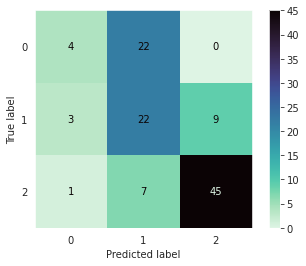

K neighbors
--------------------
--------------------
Accuracy Score : 56.64%
              precision    recall  f1-score   support

           0       0.31      0.19      0.24        26
           1       0.47      0.59      0.52        34
           2       0.72      0.74      0.73        53

    accuracy                           0.57       113
   macro avg       0.50      0.51      0.50       113
weighted avg       0.55      0.57      0.55       113



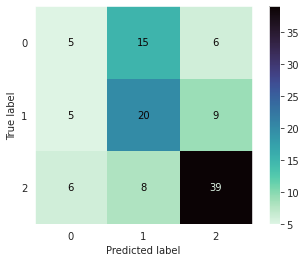

Decision tree classifier
--------------------
--------------------
Accuracy Score : 53.98%
              precision    recall  f1-score   support

           0       0.35      0.27      0.30        26
           1       0.41      0.47      0.44        34
           2       0.70      0.72      0.71        53

    accuracy                           0.54       113
   macro avg       0.49      0.49      0.48       113
weighted avg       0.53      0.54      0.54       113



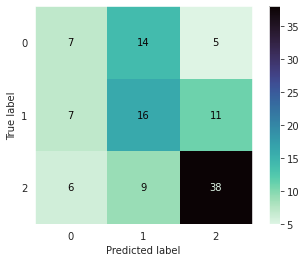

SVM
--------------------
--------------------
Accuracy Score : 61.95%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.45      0.71      0.55        34
           2       0.77      0.87      0.81        53

    accuracy                           0.62       113
   macro avg       0.41      0.52      0.46       113
weighted avg       0.50      0.62      0.55       113



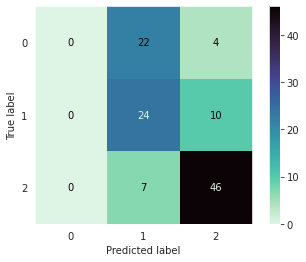

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 65.49%
              precision    recall  f1-score   support

           0       0.86      0.23      0.36        26
           1       0.47      0.79      0.59        34
           2       0.85      0.77      0.81        53

    accuracy                           0.65       113
   macro avg       0.73      0.60      0.59       113
weighted avg       0.74      0.65      0.64       113



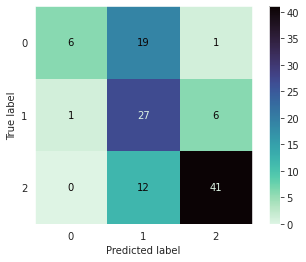

Decision tree classifier
--------------------
--------------------
Accuracy Score : 65.49%
              precision    recall  f1-score   support

           0       0.86      0.23      0.36        26
           1       0.47      0.79      0.59        34
           2       0.85      0.77      0.81        53

    accuracy                           0.65       113
   macro avg       0.73      0.60      0.59       113
weighted avg       0.74      0.65      0.64       113



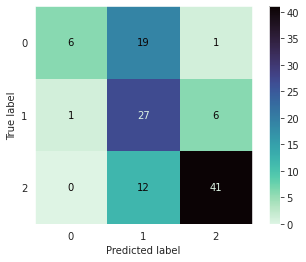

In [75]:
test_regression_models(X_train, X_test, y_train, y_test)

### Experiments with oversampled data


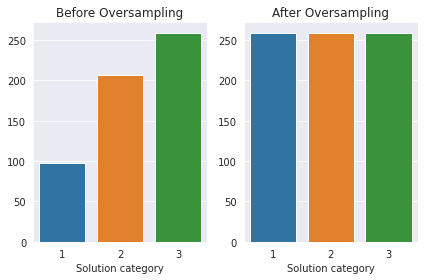

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['1', '2', '3'], y =[sum(y == 0), sum(y == 1), sum(y == 2)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Solution category')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

sns.barplot(x=['1', '2', '3'], y =[sum(y_oversampled == 0), sum(y_oversampled == 1), sum(y_oversampled == 2)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Solution category')

plt.tight_layout()
plt.show()

In [63]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        52
           1       0.60      0.52      0.56        56
           2       0.82      0.85      0.84        48

    accuracy                           0.67       156
   macro avg       0.67      0.68      0.67       156
weighted avg       0.66      0.67      0.66       156



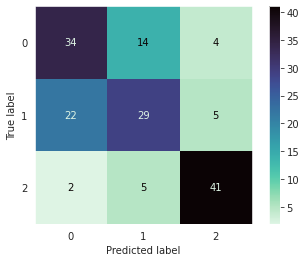

Gaussian NB
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.70      0.62      0.65        52
           1       0.56      0.68      0.61        56
           2       0.81      0.71      0.76        48

    accuracy                           0.67       156
   macro avg       0.69      0.67      0.67       156
weighted avg       0.68      0.67      0.67       156



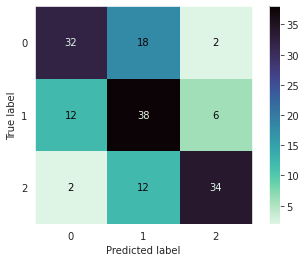

Random forest classifier
--------------------
--------------------
Accuracy Score : 78.21%
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        52
           1       0.78      0.62      0.69        56
           2       0.80      0.83      0.82        48

    accuracy                           0.78       156
   macro avg       0.78      0.79      0.78       156
weighted avg       0.78      0.78      0.78       156



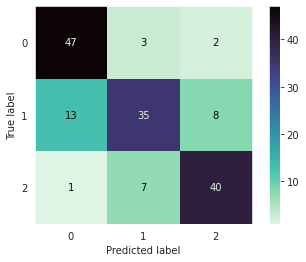

XGB classifier
--------------------
--------------------
Accuracy Score : 73.72%
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        52
           1       0.69      0.61      0.65        56
           2       0.78      0.81      0.80        48

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.73      0.74      0.73       156



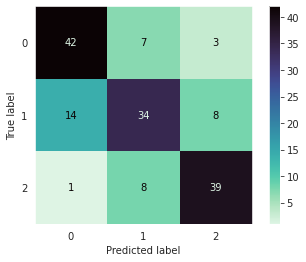

K neighbors
--------------------
--------------------
Accuracy Score : 76.28%
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        52
           1       0.73      0.59      0.65        56
           2       0.90      0.77      0.83        48

    accuracy                           0.76       156
   macro avg       0.78      0.77      0.76       156
weighted avg       0.77      0.76      0.76       156



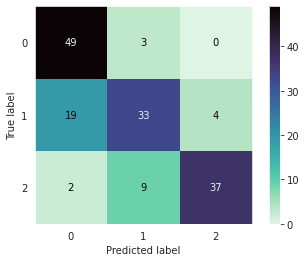

Decision tree classifier
--------------------
--------------------
Accuracy Score : 67.31%
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        52
           1       0.64      0.50      0.56        56
           2       0.67      0.69      0.68        48

    accuracy                           0.67       156
   macro avg       0.67      0.68      0.67       156
weighted avg       0.67      0.67      0.67       156



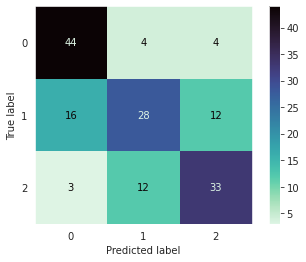

SVM
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.63      0.56      0.59        52
           1       0.60      0.57      0.59        56
           2       0.75      0.90      0.82        48

    accuracy                           0.67       156
   macro avg       0.66      0.67      0.67       156
weighted avg       0.66      0.67      0.66       156



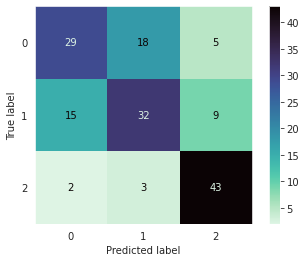

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 69.87%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.65      0.55      0.60        56
           2       0.85      0.85      0.85        48

    accuracy                           0.70       156
   macro avg       0.71      0.71      0.70       156
weighted avg       0.70      0.70      0.70       156



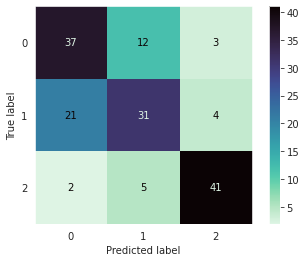

Decision tree classifier
--------------------
--------------------
Accuracy Score : 69.87%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.65      0.55      0.60        56
           2       0.85      0.85      0.85        48

    accuracy                           0.70       156
   macro avg       0.71      0.71      0.70       156
weighted avg       0.70      0.70      0.70       156



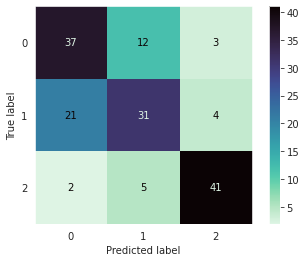

In [76]:
test_regression_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

## Classification experiments with dataset with statistical values for the every jumbo n/10 of the input

### Experiments with original data

In [77]:
extended_runs['Class'] = extended_runs.apply (lambda row: classification_condition(row), axis=1)

In [78]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'Class'])
y = extended_runs['Class']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 55.75%
              precision    recall  f1-score   support

           0       0.60      0.12      0.19        26
           1       0.37      0.62      0.46        34
           2       0.76      0.74      0.75        53

    accuracy                           0.56       113
   macro avg       0.58      0.49      0.47       113
weighted avg       0.61      0.56      0.54       113



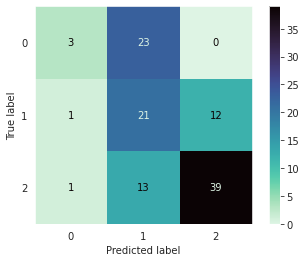

Gaussian NB
--------------------
--------------------
Accuracy Score : 61.06%
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        26
           1       0.49      0.71      0.58        34
           2       0.80      0.68      0.73        53

    accuracy                           0.61       113
   macro avg       0.59      0.58      0.57       113
weighted avg       0.63      0.61      0.61       113



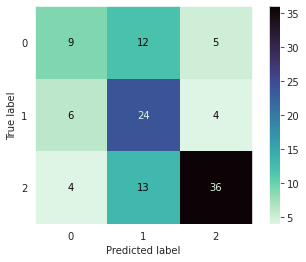

Random forest classifier
--------------------
--------------------
Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.60      0.12      0.19        26
           1       0.48      0.74      0.58        34
           2       0.79      0.83      0.81        53

    accuracy                           0.64       113
   macro avg       0.62      0.56      0.53       113
weighted avg       0.65      0.64      0.60       113



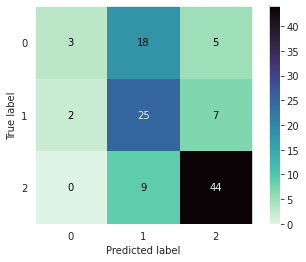

XGB classifier
--------------------
--------------------
Accuracy Score : 66.37%
              precision    recall  f1-score   support

           0       0.73      0.31      0.43        26
           1       0.49      0.71      0.58        34
           2       0.81      0.81      0.81        53

    accuracy                           0.66       113
   macro avg       0.68      0.61      0.61       113
weighted avg       0.70      0.66      0.65       113



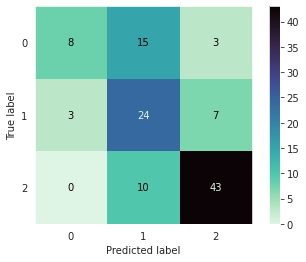

K neighbors
--------------------
--------------------
Accuracy Score : 56.64%
              precision    recall  f1-score   support

           0       0.32      0.27      0.29        26
           1       0.46      0.53      0.49        34
           2       0.75      0.74      0.74        53

    accuracy                           0.57       113
   macro avg       0.51      0.51      0.51       113
weighted avg       0.56      0.57      0.56       113



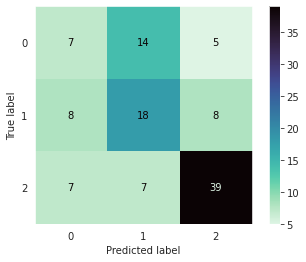

Decision tree classifier
--------------------
--------------------
Accuracy Score : 59.29%
              precision    recall  f1-score   support

           0       0.44      0.27      0.33        26
           1       0.50      0.56      0.53        34
           2       0.69      0.77      0.73        53

    accuracy                           0.59       113
   macro avg       0.54      0.53      0.53       113
weighted avg       0.58      0.59      0.58       113



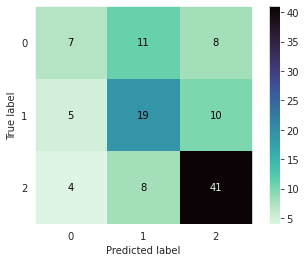

SVM
--------------------
--------------------
Accuracy Score : 59.29%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.56      0.56      0.56        34
           2       0.61      0.91      0.73        53

    accuracy                           0.59       113
   macro avg       0.39      0.49      0.43       113
weighted avg       0.45      0.59      0.51       113



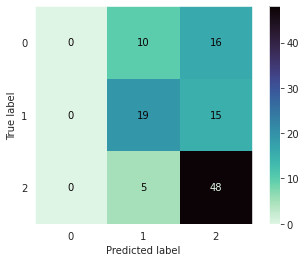

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.49      0.68      0.57        34
           2       0.83      0.75      0.79        53

    accuracy                           0.64       113
   macro avg       0.61      0.59      0.59       113
weighted avg       0.65      0.64      0.64       113



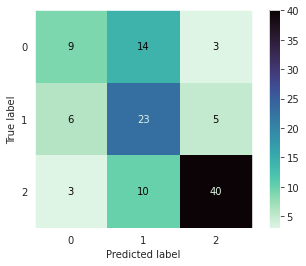

Decision tree classifier
--------------------
--------------------
Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.49      0.68      0.57        34
           2       0.83      0.75      0.79        53

    accuracy                           0.64       113
   macro avg       0.61      0.59      0.59       113
weighted avg       0.65      0.64      0.64       113



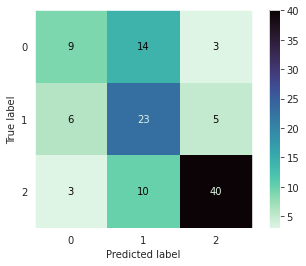

In [80]:
test_regression_models(X_train, X_test, y_train, y_test)

### Experiments with oversampled data


In [81]:
sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

In [82]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 67.31%
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        52
           1       0.64      0.48      0.55        56
           2       0.79      0.77      0.78        48

    accuracy                           0.67       156
   macro avg       0.68      0.68      0.67       156
weighted avg       0.68      0.67      0.67       156



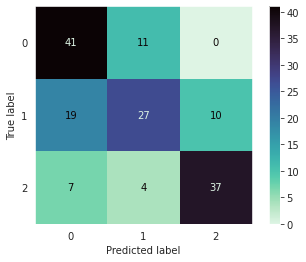

Gaussian NB
--------------------
--------------------
Accuracy Score : 60.26%
              precision    recall  f1-score   support

           0       0.58      0.48      0.53        52
           1       0.57      0.66      0.61        56
           2       0.67      0.67      0.67        48

    accuracy                           0.60       156
   macro avg       0.61      0.60      0.60       156
weighted avg       0.60      0.60      0.60       156



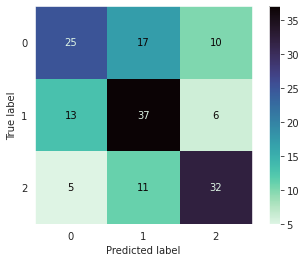

Random forest classifier
--------------------
--------------------
Accuracy Score : 78.21%
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.77      0.71      0.74        56
           2       0.76      0.79      0.78        48

    accuracy                           0.78       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.78      0.78      0.78       156



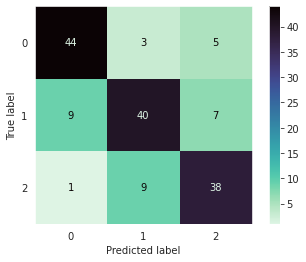

XGB classifier
--------------------
--------------------
Accuracy Score : 76.28%
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.78      0.62      0.69        56
           2       0.75      0.88      0.81        48

    accuracy                           0.76       156
   macro avg       0.76      0.77      0.76       156
weighted avg       0.76      0.76      0.76       156



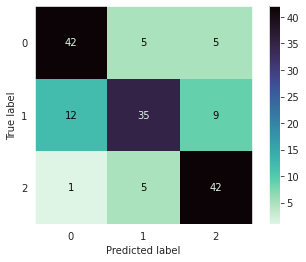

K neighbors
--------------------
--------------------
Accuracy Score : 62.82%
              precision    recall  f1-score   support

           0       0.56      0.88      0.69        52
           1       0.62      0.45      0.52        56
           2       0.79      0.56      0.66        48

    accuracy                           0.63       156
   macro avg       0.66      0.63      0.62       156
weighted avg       0.66      0.63      0.62       156



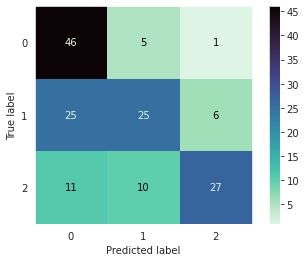

Decision tree classifier
--------------------
--------------------
Accuracy Score : 59.62%
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        52
           1       0.54      0.46      0.50        56
           2       0.61      0.62      0.62        48

    accuracy                           0.60       156
   macro avg       0.59      0.60      0.60       156
weighted avg       0.59      0.60      0.59       156



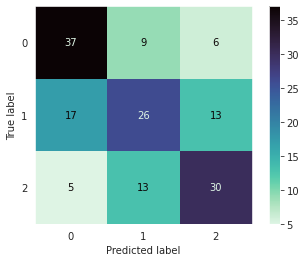

SVM
--------------------
--------------------
Accuracy Score : 67.31%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.74      0.45      0.56        56
           2       0.69      0.90      0.78        48

    accuracy                           0.67       156
   macro avg       0.68      0.68      0.67       156
weighted avg       0.68      0.67      0.66       156



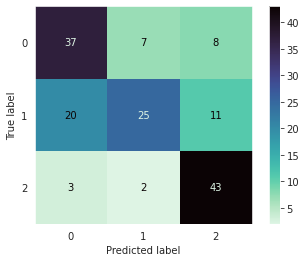

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 72.44%
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        52
           1       0.71      0.54      0.61        56
           2       0.87      0.81      0.84        48

    accuracy                           0.72       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.74      0.72      0.72       156



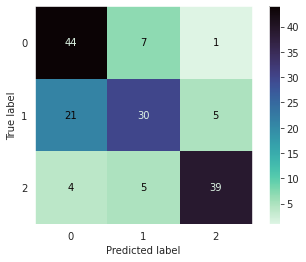

Decision tree classifier
--------------------
--------------------
Accuracy Score : 72.44%
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        52
           1       0.71      0.54      0.61        56
           2       0.87      0.81      0.84        48

    accuracy                           0.72       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.74      0.72      0.72       156



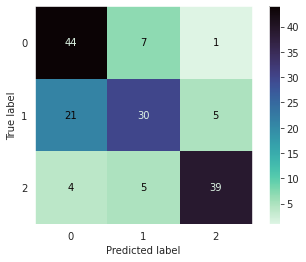

In [83]:
test_regression_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)